# Imports

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Data

In [106]:
df = pd.read_csv("./data/train.csv")

x = df.iloc[:,2:168]
y = df.iloc[:, 168]
# y =df["class"]
# x = df.drop(["molecule", "conformation", "class"], axis = 1)
y = y.abs()
x = x.abs()
x.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F157,F158,F159,F160,F161,F162,F163,F164,F165,F166
0,42,198,109,75,117,11,23,88,28,27,...,238,74,129,120,38,30,48,37,6,30
1,42,191,142,65,117,55,49,170,45,5,...,238,302,60,120,39,31,48,37,5,30
2,42,191,142,75,117,11,49,161,45,28,...,238,73,127,120,38,30,48,37,5,31
3,42,198,110,65,117,55,23,95,28,5,...,238,302,60,120,39,30,48,37,6,30
4,42,198,102,75,117,10,24,87,28,28,...,238,73,127,51,128,144,43,30,14,26
5,42,191,142,65,117,55,49,170,45,6,...,238,300,61,51,127,143,42,31,14,26
6,42,190,142,75,117,12,49,161,45,29,...,238,72,125,51,124,143,44,30,14,29
7,42,199,102,65,117,55,23,94,29,6,...,238,300,61,51,127,144,42,30,14,25
8,40,173,142,13,116,7,50,171,44,103,...,236,53,20,38,88,133,66,28,13,58
9,44,159,63,74,117,17,5,114,31,33,...,235,62,111,12,153,134,45,37,9,25


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.7, random_state=42)

# Model

In [108]:
knc = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=2)
knc.fit(x_train,y_train)
knc_predict = knc.predict(x_test)

In [109]:
accuracy_rfc = metrics.accuracy_score(y_test, knc_predict)
knc_cvs = cross_val_score(knc, x_train,y_train, cv=10 )
print("K neighbors cross val::", metrics.accuracy_score(y_test, knc_predict))
print(accuracy_rfc)
print(metrics.classification_report(y_test, knc_predict))

K neighbors cross val:: 0.7894736842105263
0.7894736842105263
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82       124
         1.0       0.80      0.71      0.76       104

    accuracy                           0.79       228
   macro avg       0.79      0.78      0.79       228
weighted avg       0.79      0.79      0.79       228



# Plot

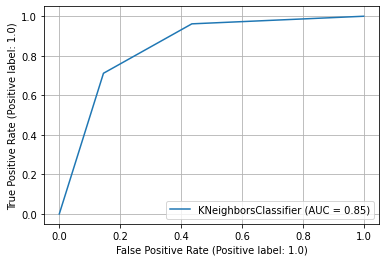

In [110]:
knc_disp = plot_roc_curve(knc, x_test, y_test)
plt.grid()
plt.savefig("k_neighbors_roc.png")

In [111]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [112]:
# Change run to tune hyperparameters
run = False

if run:
    knn_2 = KNeighborsClassifier()
    #Use GridSearch
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    #Fit the model
    best_model = clf.fit(x,y)
    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# MPL

In [113]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)

ypred = mlp.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(ypred, y_test))

Accuracy:  0.7280701754385965
